In [1]:
# STEP 1 — Imports
import io
import pandas as pd
import numpy as np
from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score
)

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# STEP 2 — Upload CSV
uploaded = files.upload()  # pick your file in the dialog
filename = next(iter(uploaded))  # first (and usually only) uploaded file
print("Loaded file:", filename)

# Read into DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))
print(df.shape)
df.head()


Saving updated_u2714523_DS7010_Credit.csv to updated_u2714523_DS7010_Credit.csv
Loaded file: updated_u2714523_DS7010_Credit.csv
(37382, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,160000,2,2,2,33,2,2,3,2,0,...,164310,162681,163005,15000,0,0,6100,12300,6100,0
1,150000,2,1,2,34,1,-1,-1,-2,-2,...,0,0,0,53,0,0,0,0,0,0
2,10000,1,2,1,50,1,2,0,0,0,...,8067,8227,8400,2,1281,1134,294,305,1000,0
3,220000,2,1,2,29,0,0,0,0,0,...,218513,131660,134346,9100,9000,7887,4800,4900,6000,1
4,310000,2,1,2,32,1,-2,-1,0,0,...,326,-235,-235,0,326,0,0,0,1200,0


In [3]:
# STEP 3 — Select only the specified columns
selected_columns = [
    "LIMIT_BAL", "SEX", "EDUCATION", "AGE",
    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
    "default payment next month"
]

missing = [c for c in selected_columns if c not in df.columns]
if missing:
    raise ValueError(f"These required columns are missing in your CSV: {missing}")

df = df[selected_columns].copy()
print("Data after column selection:", df.shape)
df.head()


Data after column selection: (37382, 23)


,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,160000,2,2,33,2,2,3,2,0,0,...,164310,162681,163005,15000,0,0,6100,12300,6100,0
1,150000,2,1,34,1,-1,-1,-2,-2,-2,...,0,0,0,53,0,0,0,0,0,0
2,10000,1,2,50,1,2,0,0,0,0,...,8067,8227,8400,2,1281,1134,294,305,1000,0
3,220000,2,1,29,0,0,0,0,0,0,...,218513,131660,134346,9100,9000,7887,4800,4900,6000,1
4,310000,2,1,32,1,-2,-1,0,0,-2,...,326,-235,-235,0,326,0,0,0,1200,0


In [4]:
# STEP 4 — Define X (features) and y (target)
TARGET = "default payment next month"
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)  # ensure ints (0/1)

# Optional: quick class balance check
print("Class distribution (0/1):")
print(y.value_counts(normalize=True).sort_index())

# 80/20 split with stratify to keep class balance similar in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

X_train.shape, X_test.shape


Class distribution (0/1):
default payment next month
0    0.5
1    0.5
Name: proportion, dtype: float64


((29905, 22), (7477, 22))

In [5]:
# STEP 5 — Min-Max Scaling
scaler = MinMaxScaler()

# Fit ONLY on training data, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [6]:
# STEP 6 — Initial MLP model
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),   # 2 layers
    activation="relu",
    solver="adam",
    max_iter=300,
    random_state=42,
    early_stopping=True,           # uses a validation split from the training set
    n_iter_no_change=10
)

mlp.fit(X_train_scaled, y_train)
print("Training done.")
print("Epochs used:", mlp.n_iter_)


Training done.
Epochs used: 38


Accuracy: 0.7393

Classification Report:
              precision    recall  f1-score   support

           0     0.7551    0.7085    0.7311      3739
           1     0.7254    0.7702    0.7471      3738

    accuracy                         0.7393      7477
   macro avg     0.7403    0.7393    0.7391      7477
weighted avg     0.7403    0.7393    0.7391      7477



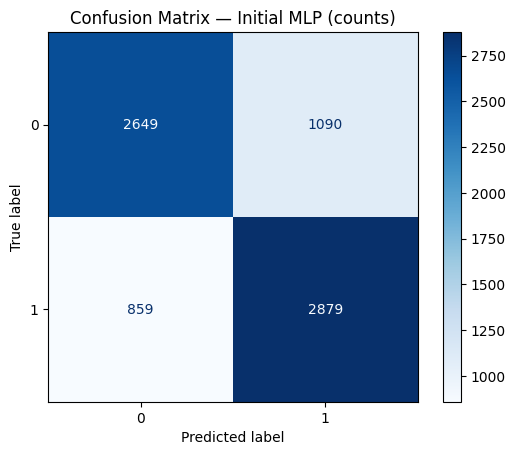

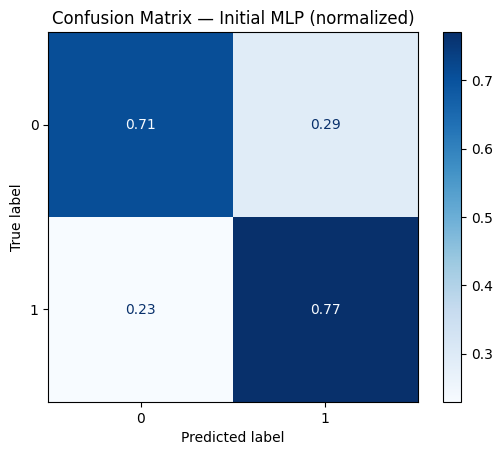

In [7]:
# STEP 7 — Evaluate
y_pred = mlp.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix (counts)
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix — Initial MLP (counts)")
plt.show()

# (Optional) Normalized confusion matrix
cm_norm = confusion_matrix(y_test, y_pred, labels=mlp.classes_, normalize='true')
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=mlp.classes_)
disp_norm.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Confusion Matrix — Initial MLP (normalized)")
plt.show()


In [8]:
# STEP 1 — Import
from sklearn.model_selection import GridSearchCV


In [9]:
# STEP 2 — Define parameter grid
param_grid = {
    "hidden_layer_sizes": [(32,), (64,), (64,32), (100,50)],
    "activation": ["relu", "tanh", "logistic"],
    "alpha": [0.0001, 0.001, 0.01],
    "learning_rate_init": [0.001, 0.01]
}


In [10]:
# STEP 3 — Define GridSearchCV with MLP
mlp_tune = MLPClassifier(
    max_iter=300,
    random_state=42,
    early_stopping=True
)

grid_search = GridSearchCV(
    estimator=mlp_tune,
    param_grid=param_grid,
    cv=3,              # 3-fold cross-validation
    scoring="accuracy",
    n_jobs=-1,         # use all CPUs
    verbose=2
)


In [11]:
# STEP 4 — Fit on training set (scaled data)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.01}
Best CV Accuracy: 0.7498411072183586


Test Accuracy: 0.7563193794302527

Classification Report:
               precision    recall  f1-score   support

           0     0.7337    0.8048    0.7676      3739
           1     0.7838    0.7079    0.7439      3738

    accuracy                         0.7563      7477
   macro avg     0.7587    0.7563    0.7557      7477
weighted avg     0.7587    0.7563    0.7557      7477



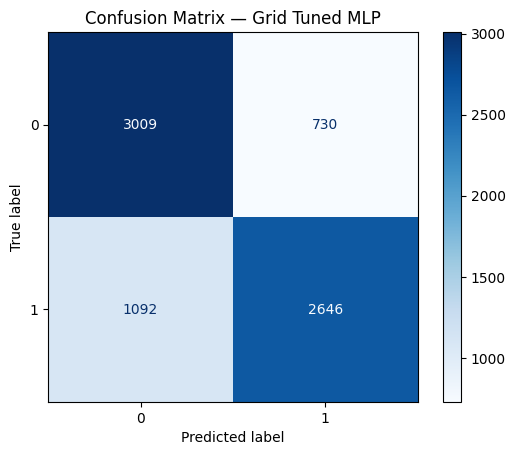

In [12]:
# STEP 5 — Evaluate on test data
best_mlp = grid_search.best_estimator_

y_pred_best = best_mlp.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_mlp.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix — Grid Tuned MLP")
plt.show()


In [17]:
# STEP 1 — Install imbalanced-learn (if not already installed)
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt


In [18]:
# STEP 2 — Oversample minority class with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE :", y_train_res.value_counts())


Before SMOTE: default payment next month
1    14953
0    14952
Name: count, dtype: int64
After SMOTE : default payment next month
1    14953
0    14953
Name: count, dtype: int64


In [20]:
# STEP 3 — Define and train MLP
mlp_cost = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=300,
    random_state=42,
    early_stopping=True
)

mlp_cost.fit(X_train_res, y_train_res)
print("Training complete.")


Training complete.


Accuracy: 0.7489634880299585

Classification Report:
               precision    recall  f1-score   support

           0     0.7458    0.7555    0.7506      3739
           1     0.7522    0.7424    0.7473      3738

    accuracy                         0.7490      7477
   macro avg     0.7490    0.7490    0.7490      7477
weighted avg     0.7490    0.7490    0.7490      7477



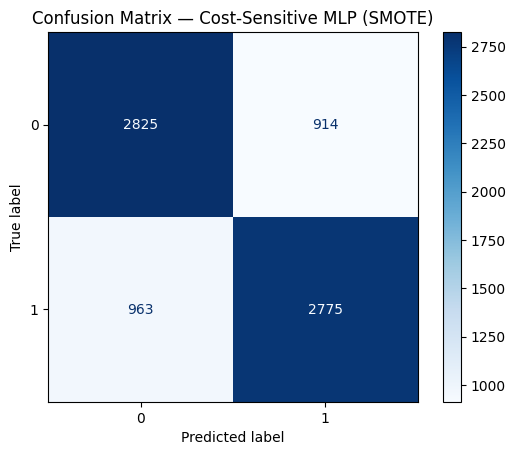

In [21]:
# STEP 4 — Predictions
y_pred_cost = mlp_cost.predict(X_test_scaled)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_cost))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cost, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_cost)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_cost.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix — Cost-Sensitive MLP (SMOTE)")
plt.show()


In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE


In [23]:
# Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


🔹 Initial KNN
Accuracy: 0.7461548749498462
              precision    recall  f1-score   support

           0     0.7524    0.7339    0.7430      3739
           1     0.7402    0.7584    0.7492      3738

    accuracy                         0.7462      7477
   macro avg     0.7463    0.7462    0.7461      7477
weighted avg     0.7463    0.7462    0.7461      7477



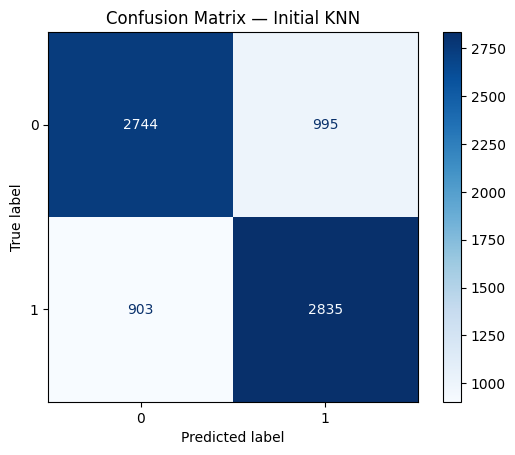

In [24]:
# Initial KNN
knn_initial = KNeighborsClassifier(n_neighbors=5)  # default: k=5
knn_initial.fit(X_train_scaled, y_train)

y_pred_knn_init = knn_initial.predict(X_test_scaled)

print("🔹 Initial KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn_init))
print(classification_report(y_test, y_pred_knn_init, digits=4))

cm = confusion_matrix(y_test, y_pred_knn_init)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_initial.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix — Initial KNN")
plt.show()


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best CV Accuracy: 0.7669954359853158

🔹 Grid Tuned KNN
Accuracy: 0.7794570014711782
              precision    recall  f1-score   support

           0     0.8012    0.7435    0.7713      3739
           1     0.7607    0.8154    0.7871      3738

    accuracy                         0.7795      7477
   macro avg     0.7809    0.7795    0.7792      7477
weighted avg     0.7809    0.7795    0.7792      7477



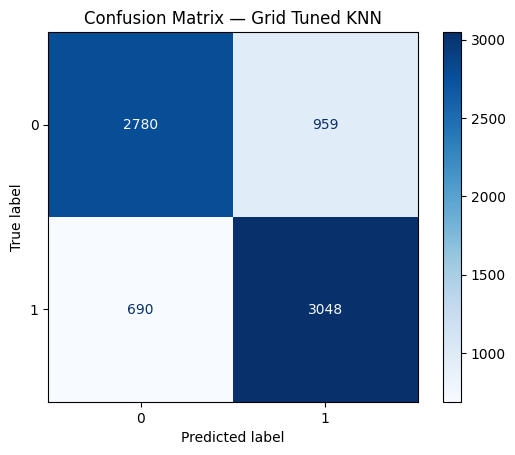

In [25]:
# Grid Search for best KNN
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11, 15],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

grid_knn.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_knn.best_params_)
print("Best CV Accuracy:", grid_knn.best_score_)

# Evaluate tuned model
knn_tuned = grid_knn.best_estimator_
y_pred_knn_tuned = knn_tuned.predict(X_test_scaled)

print("\n🔹 Grid Tuned KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn_tuned))
print(classification_report(y_test, y_pred_knn_tuned, digits=4))

cm = confusion_matrix(y_test, y_pred_knn_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_tuned.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix — Grid Tuned KNN")
plt.show()


Before SMOTE: default payment next month
1    14953
0    14952
Name: count, dtype: int64
After SMOTE : default payment next month
1    14953
0    14953
Name: count, dtype: int64

🔹 Cost-Sensitive KNN (SMOTE)
Accuracy: 0.7461548749498462
              precision    recall  f1-score   support

           0     0.7524    0.7339    0.7430      3739
           1     0.7402    0.7584    0.7492      3738

    accuracy                         0.7462      7477
   macro avg     0.7463    0.7462    0.7461      7477
weighted avg     0.7463    0.7462    0.7461      7477



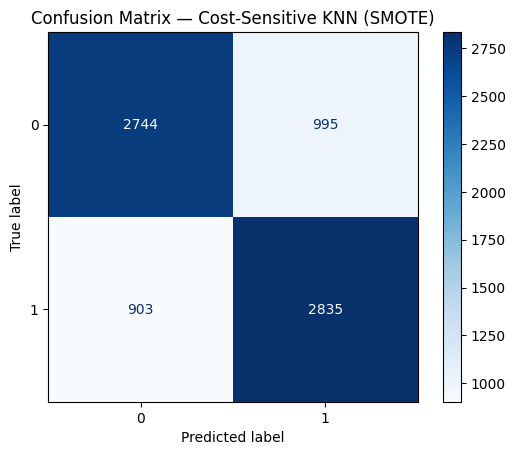

In [26]:
# Resample training data with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE :", y_train_res.value_counts())

# Train KNN on balanced data
knn_cost = KNeighborsClassifier(n_neighbors=5)
knn_cost.fit(X_train_res, y_train_res)

y_pred_knn_cost = knn_cost.predict(X_test_scaled)

print("\n🔹 Cost-Sensitive KNN (SMOTE)")
print("Accuracy:", accuracy_score(y_test, y_pred_knn_cost))
print(classification_report(y_test, y_pred_knn_cost, digits=4))

cm = confusion_matrix(y_test, y_pred_knn_cost)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_cost.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix — Cost-Sensitive KNN (SMOTE)")
plt.show()


In [27]:
results = {
    "Initial KNN": [
        accuracy_score(y_test, y_pred_knn_init)
    ],
    "Grid Tuned KNN": [
        accuracy_score(y_test, y_pred_knn_tuned)
    ],
    "Cost-Sensitive KNN": [
        accuracy_score(y_test, y_pred_knn_cost)
    ]
}

df_results = pd.DataFrame(results, index=["Accuracy"])
display(df_results)


,Initial KNN,Grid Tuned KNN,Cost-Sensitive KNN
Accuracy,0.746155,0.779457,0.746155
